In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading & Understanding the data

In [136]:
#read the data
file_path = '/Users/suryapratapsingh/Downloads/day.csv'
day = pd.read_csv(file_path)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [137]:
day.shape

(730, 16)

In [138]:
day.drop_duplicates().shape

(730, 16)

- we have 730 recorded entries in the dataset for the bikes being rented from BoomBikes

In [139]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- all the colums have 730 non-null count stating the the dataset does not have null entiries that need to be handled

In [140]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Preparing the data for modelling
- Encoding:
    - converting binary vars to 1 or 0
    - other categorical vars to dummy vars
- Splitting into train & test
- Rescaling of dummy variables

In [141]:
# renaming few columns for better readibility

day.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [142]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

day.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

- there are total of 15 numerical variables

#### Encoding/Mapping

In [143]:
day.season = day.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
day.month = day.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
day.weekday = day.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
day.weathersit = day.weathersit.map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})

<Axes: xlabel='weathersit', ylabel='cnt'>

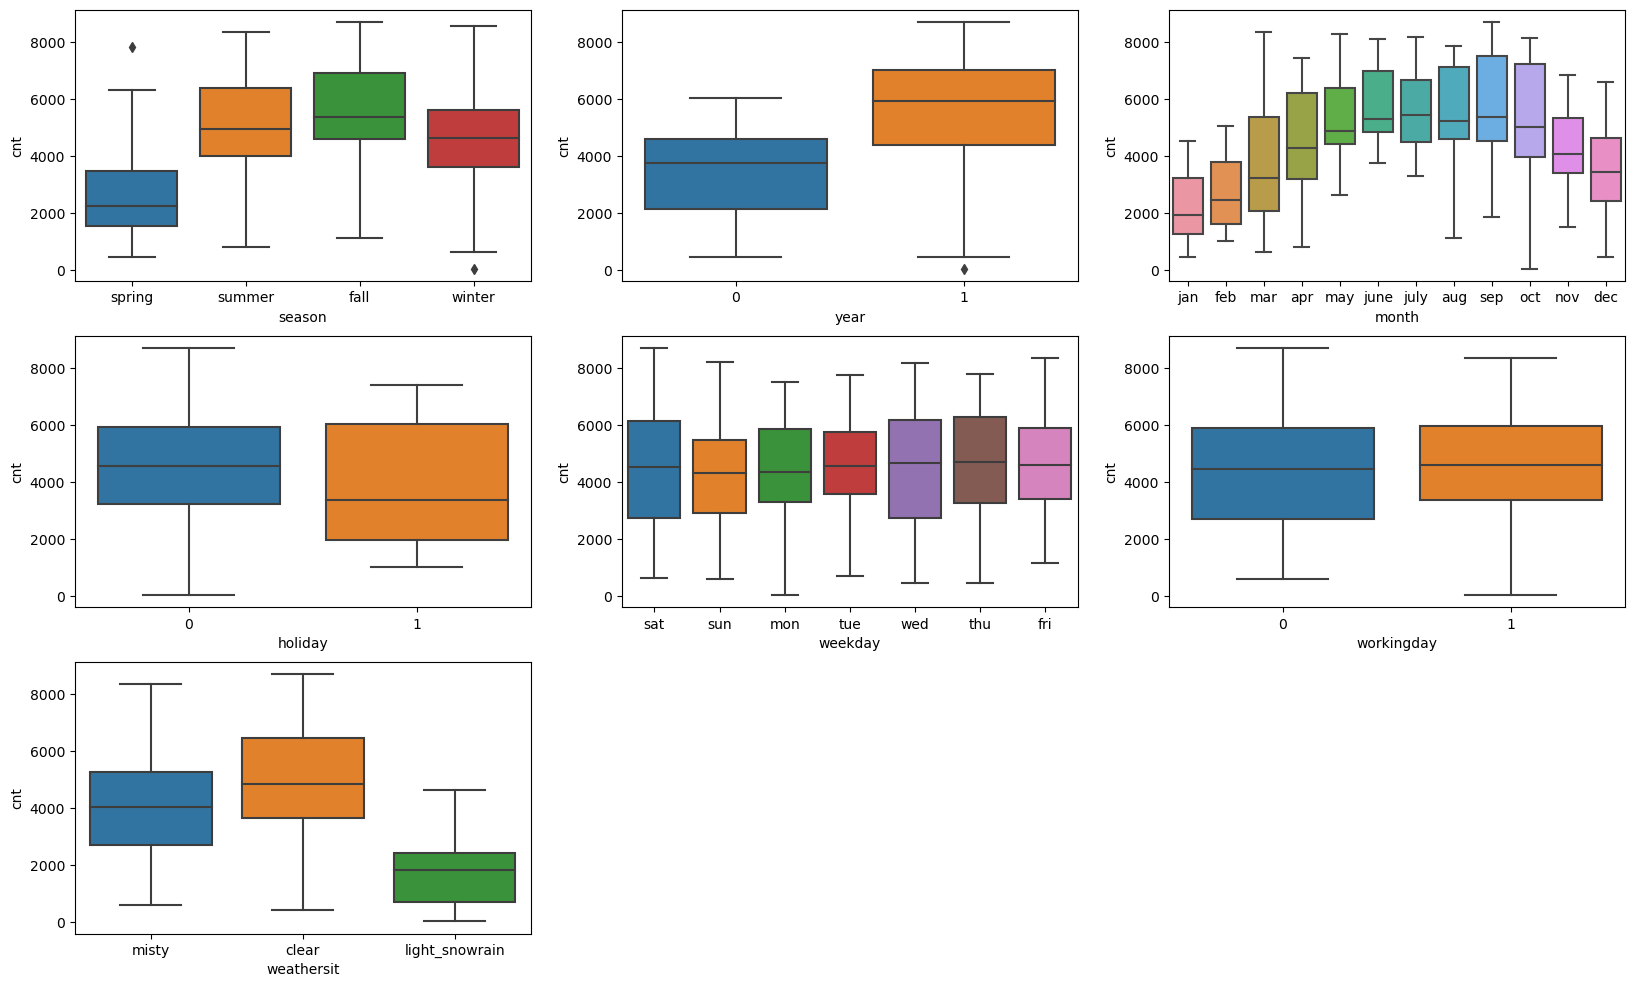

In [144]:
#Analyzing categorical variables to see the pattern in the target variable

plt.figure(figsize = (20,12))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)

plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = day)

plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = day)

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)

- here, if the model tells, e.g., that one of the variables such as month has impact on the total count of bookings, the same can be validated from the plots above

#### visualizing categorical variables

In [145]:
# function to create barplot related to categorical columns

def cat_plot(column):
    plt.figure(figsize = (18,9))
    plt.subplot(1,2,1)
#     sns.barplot(column,'cnt',data=day)
    sns.barplot(day, x=column, y='cnt')
    plt.subplot(1,2,2)
    sns.barplot(day, x = column, y= 'cnt', hue='year',palette='Set2')
    plt.legend(labels=['2018', '2019'])
    plt.show()

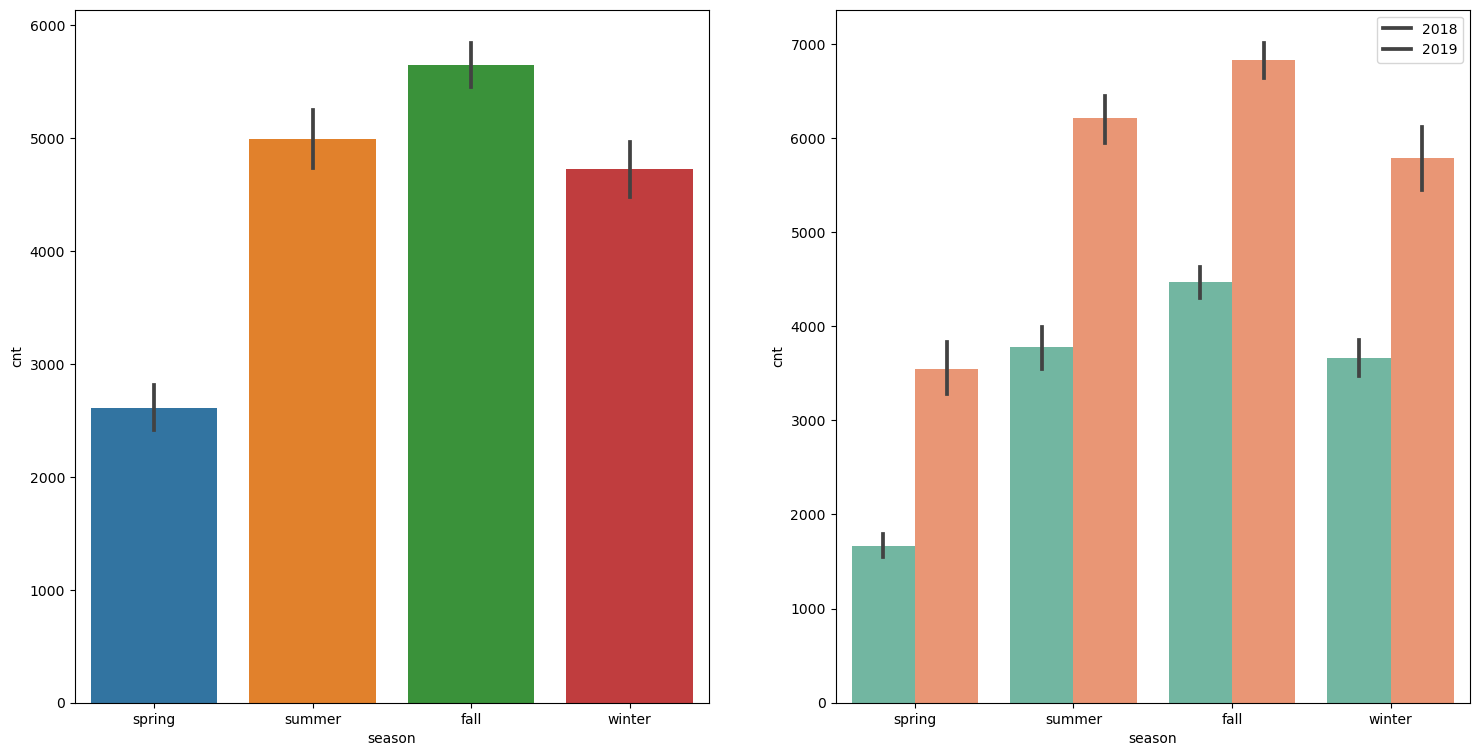

In [146]:
# plotting visualization for season column

cat_plot('season')

- Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

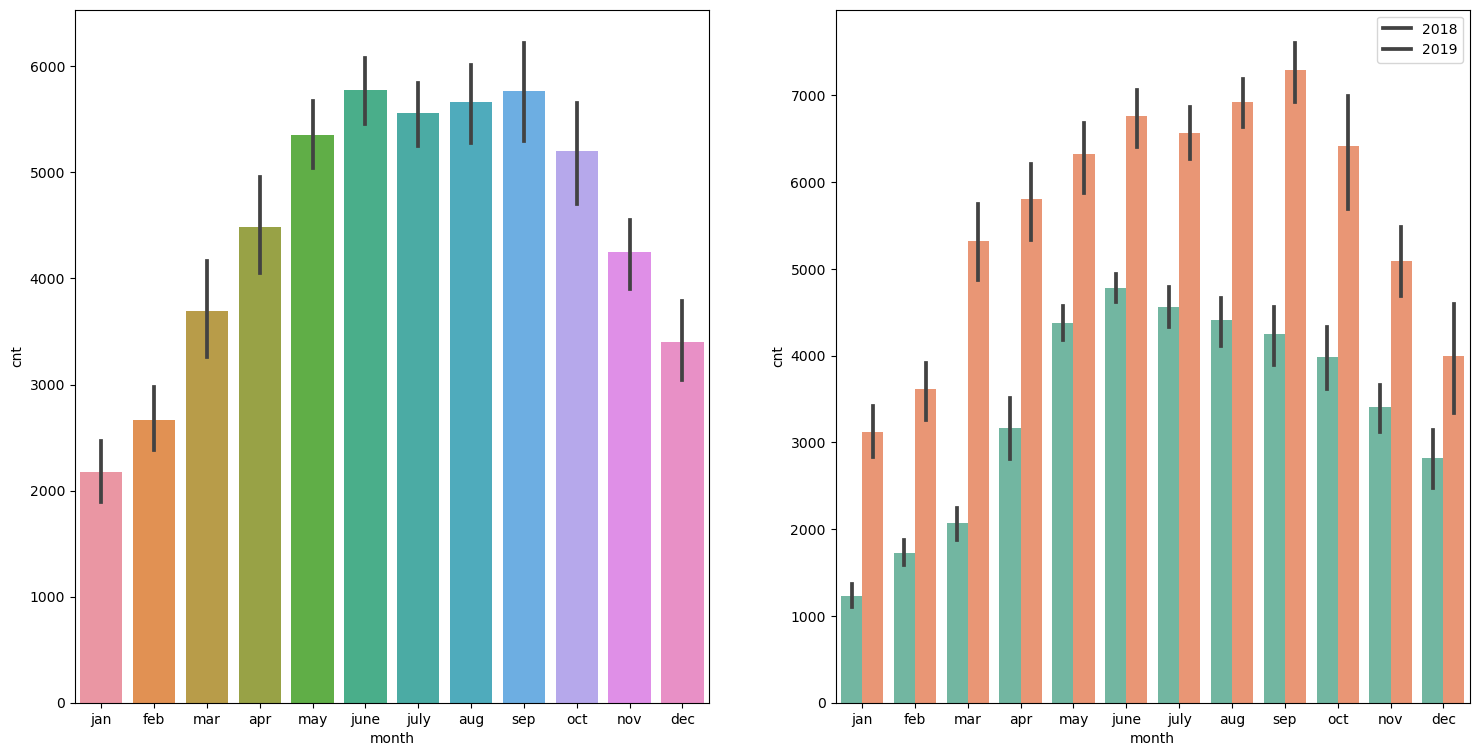

In [147]:
# plotting visualization for month column

cat_plot('month')

- Most of the bookings has been done during the month of may, june, july, aug, sep and oct.

- we observe a incling trend from the starting of the year peaks between jun-sep and then declines towards the end of the year

- Number of booking for each month seems to have increased from 2018 to 2019.

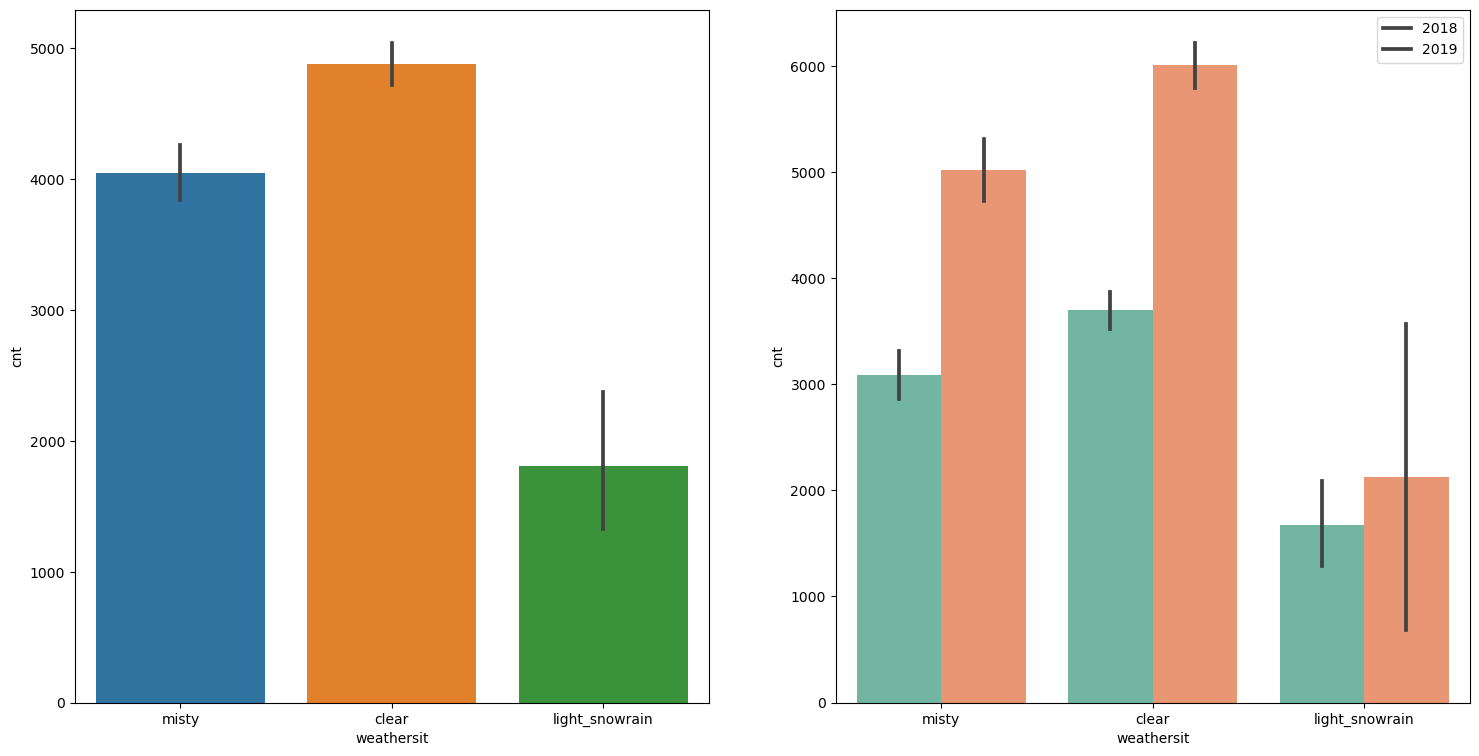

In [148]:
# plotting visualization for weathersit column

cat_plot('weathersit')

- Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

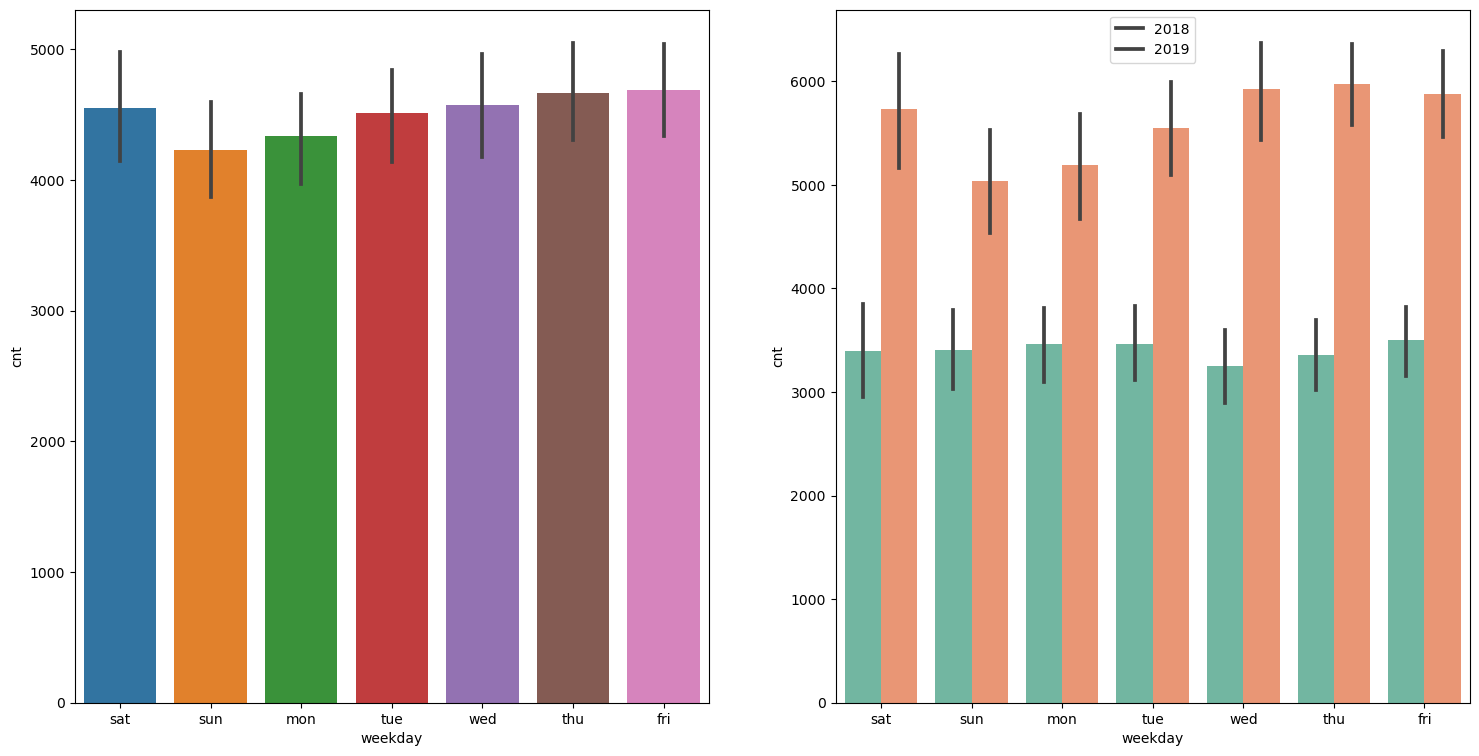

In [149]:
# plotting visualization for weekday column

cat_plot('weekday')

- Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

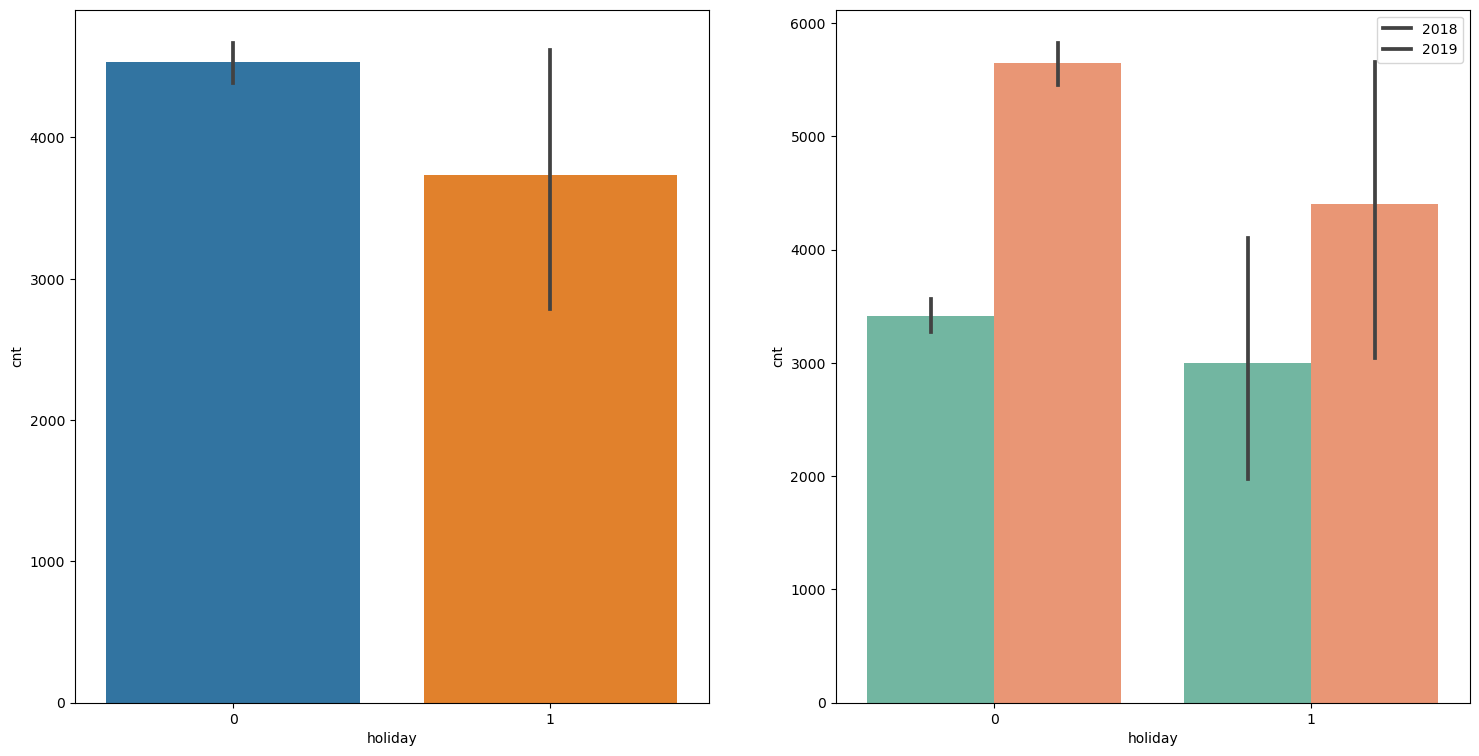

In [150]:
# plotting visualization for holiday column

cat_plot('holiday')

- When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

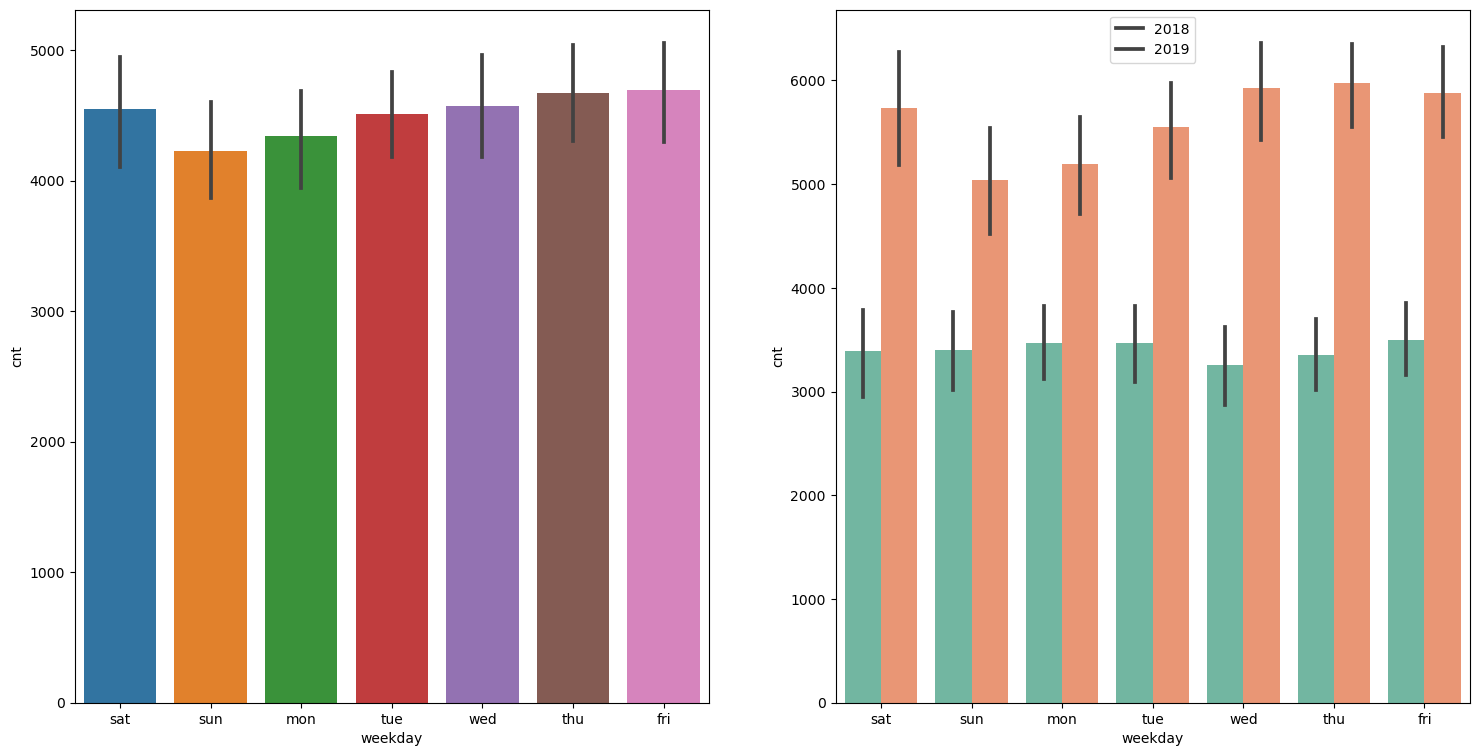

In [151]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

- Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

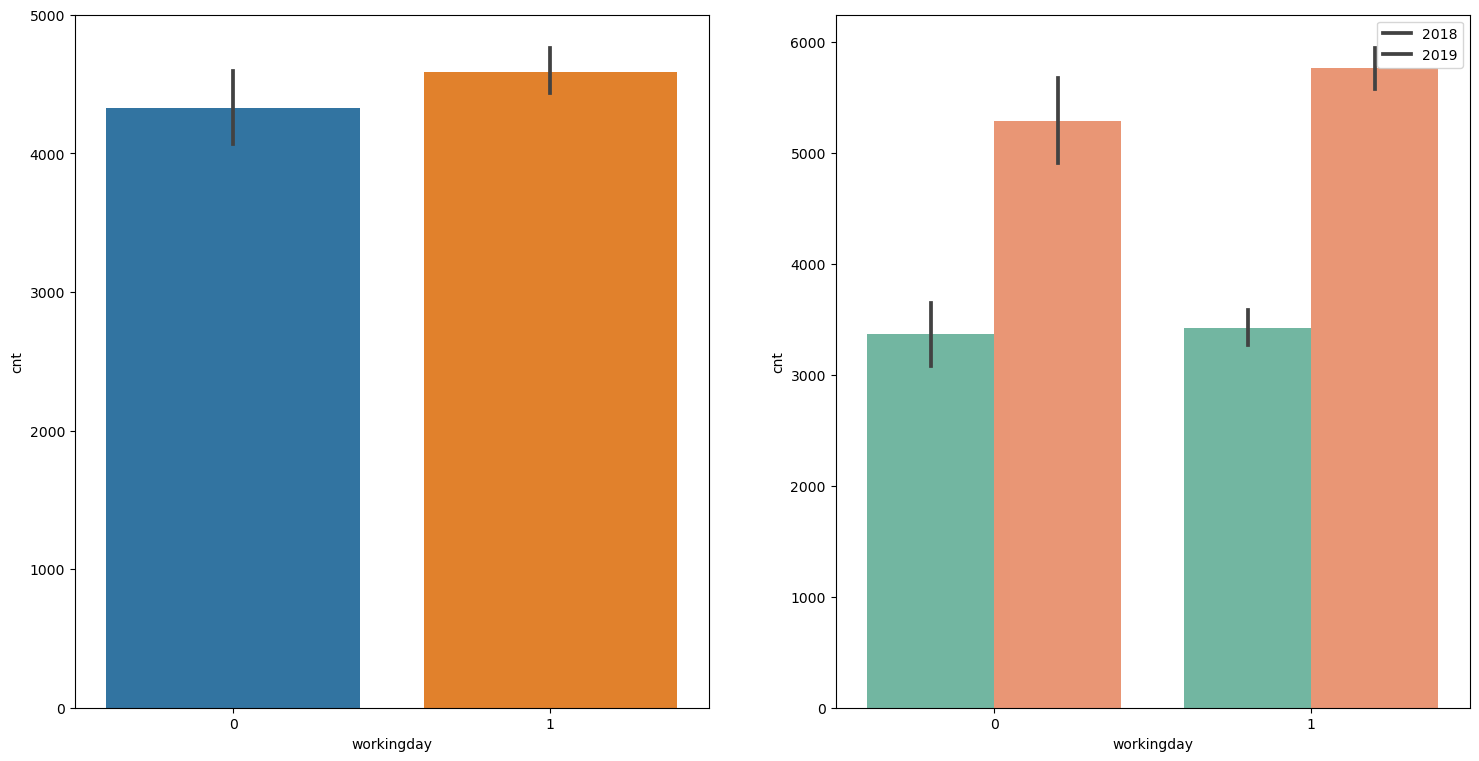

In [152]:
# plotting visualization for workingday column

cat_plot('workingday')

- Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

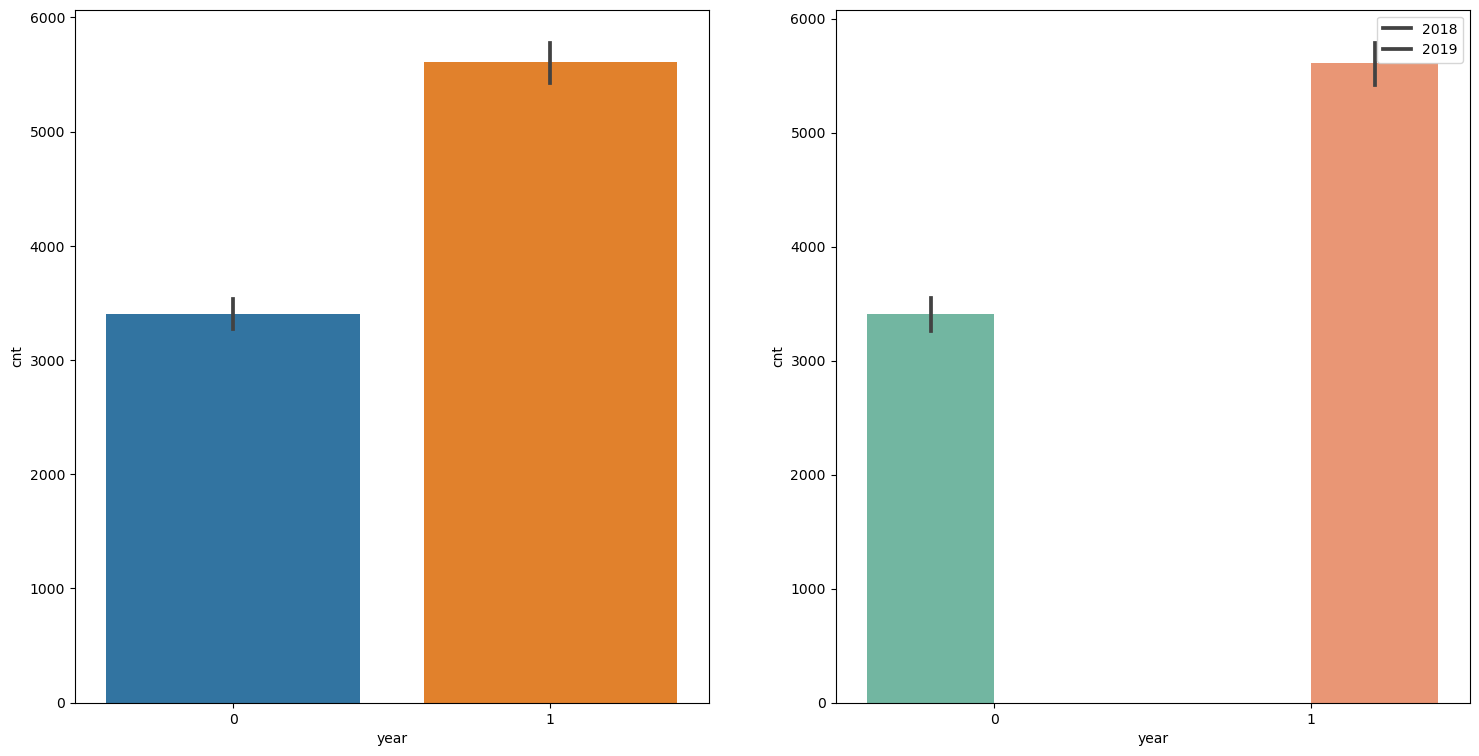

In [153]:
# plotting visualization for year column

cat_plot('year')

- 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

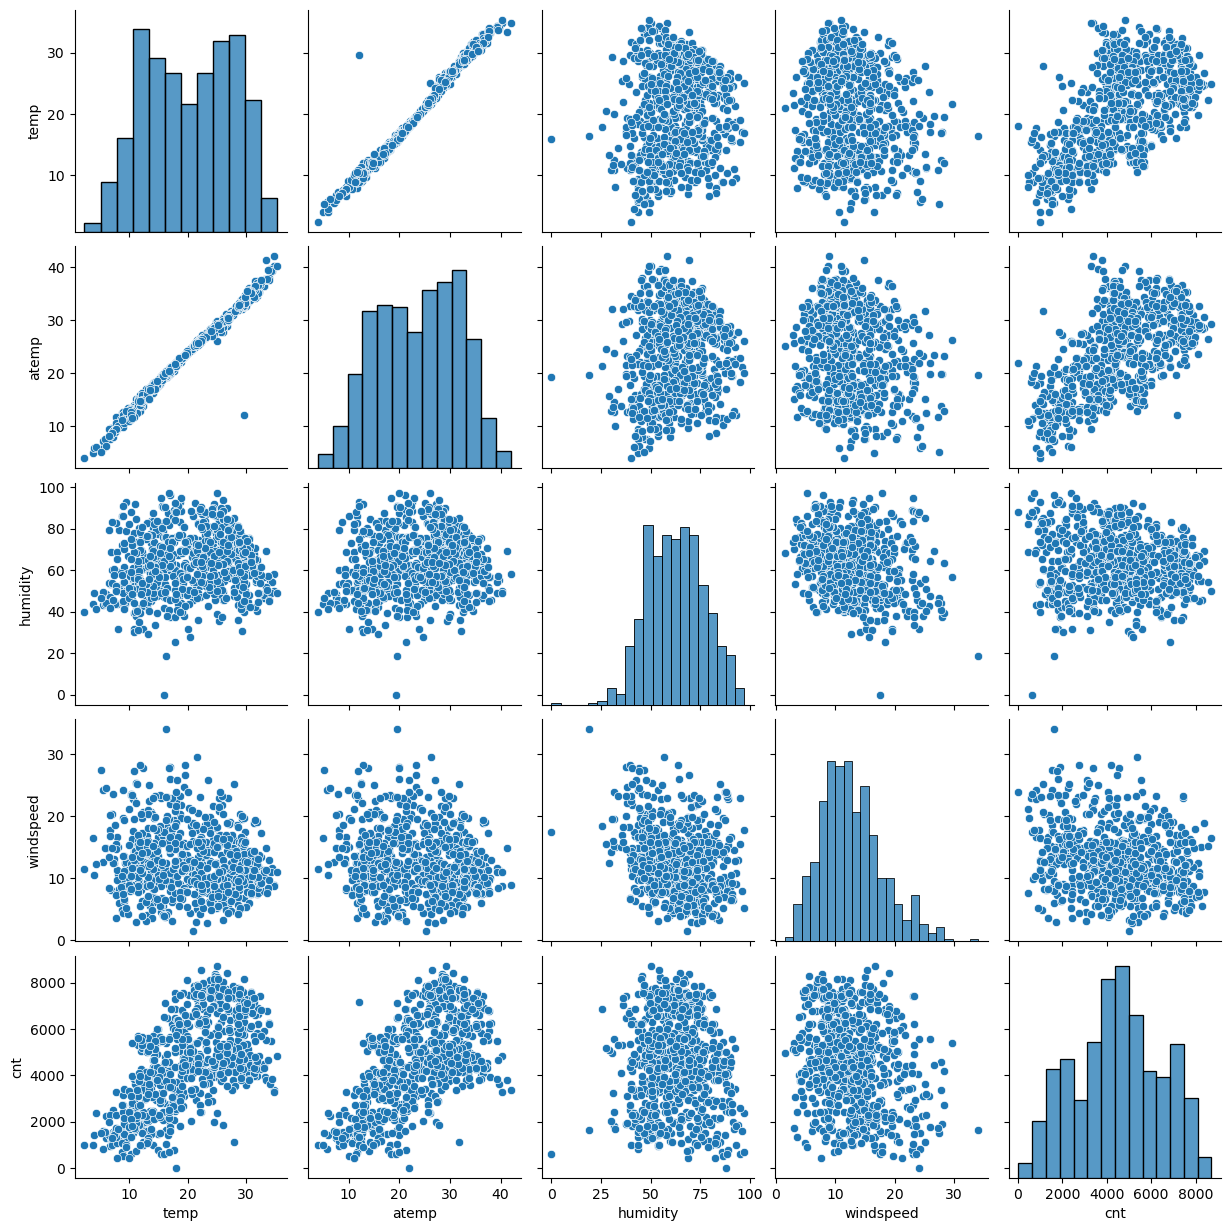

In [154]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=day,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

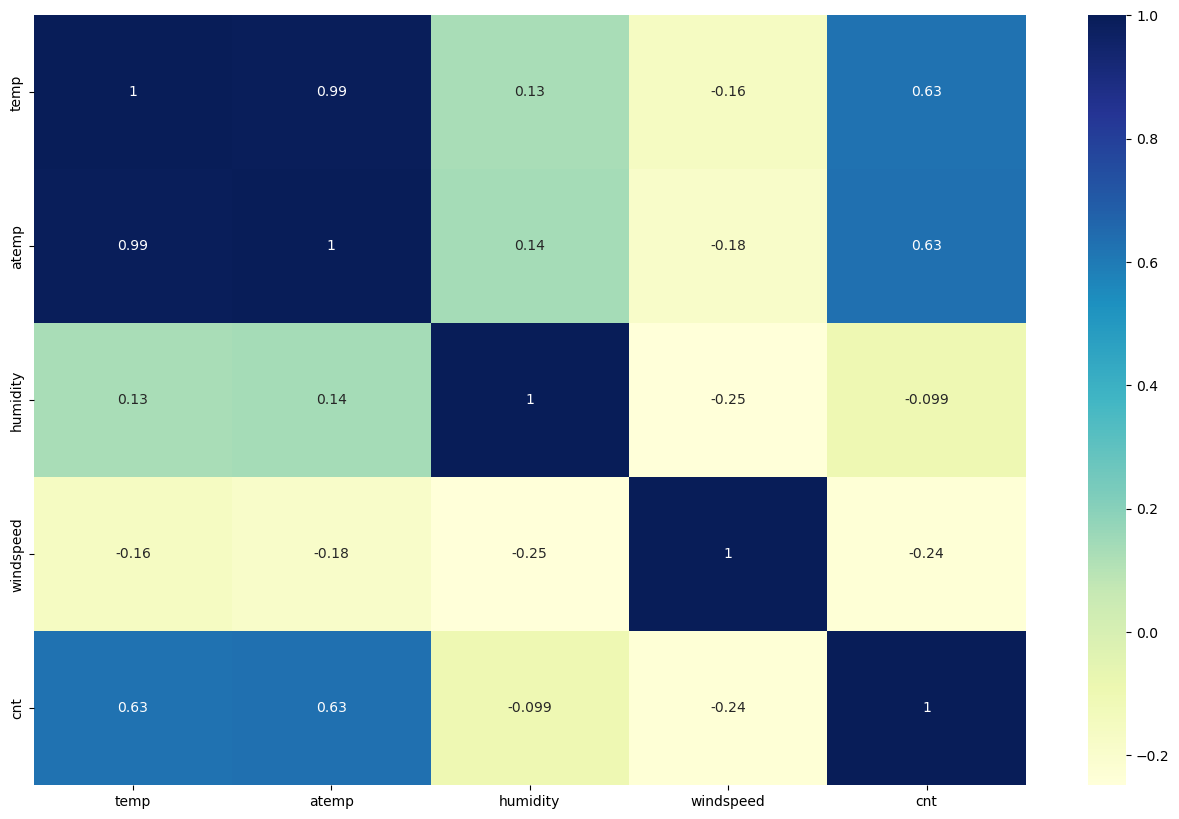

In [155]:
#heatmap - to understand how strongly the variables are correlated with cnt

plt.figure(figsize = (16,10))
sns.heatmap(day[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap = 'YlGnBu')
plt.show()

- There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Step 3: Preparing the data

In [156]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(day.month, dtype = 'int', drop_first=True)
weekdays_df=pd.get_dummies(day.weekday, dtype = 'int', drop_first=True)
weathersit_df=pd.get_dummies(day.weathersit, dtype = 'int', drop_first=True)
seasons_df=pd.get_dummies(day.season, dtype = 'int', drop_first=True)

In [157]:
months_df.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [158]:
# Merging  the dataframe, with the dummy variable dataset. 
day_new = pd.concat([day, months_df, weekdays_df, weathersit_df, seasons_df], axis = 1)

In [159]:
day_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [160]:
day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    int64  
 13  dec             730 non-null    int64  
 14  feb             730 non-null    int64  
 15  jan             730 non-null    int64  
 16  july            730 non-null    int64  
 17  june            730 non-null    int

In [161]:
# dropping unnecessary columns as we have already created dummy variable out of it.

day_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [162]:
day_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


#### Splitting into train & test

In [163]:
df_train, df_test = train_test_split(day_new, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### rescaling of variables (train set)

In [164]:
# 1. Instantitate an object
scaler = MinMaxScaler() # we only want to scale the numeric variables and not binary variables

#apply min max scaling to all numerical variables except binary variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

#2. Using fit_transform() to fit on the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [165]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


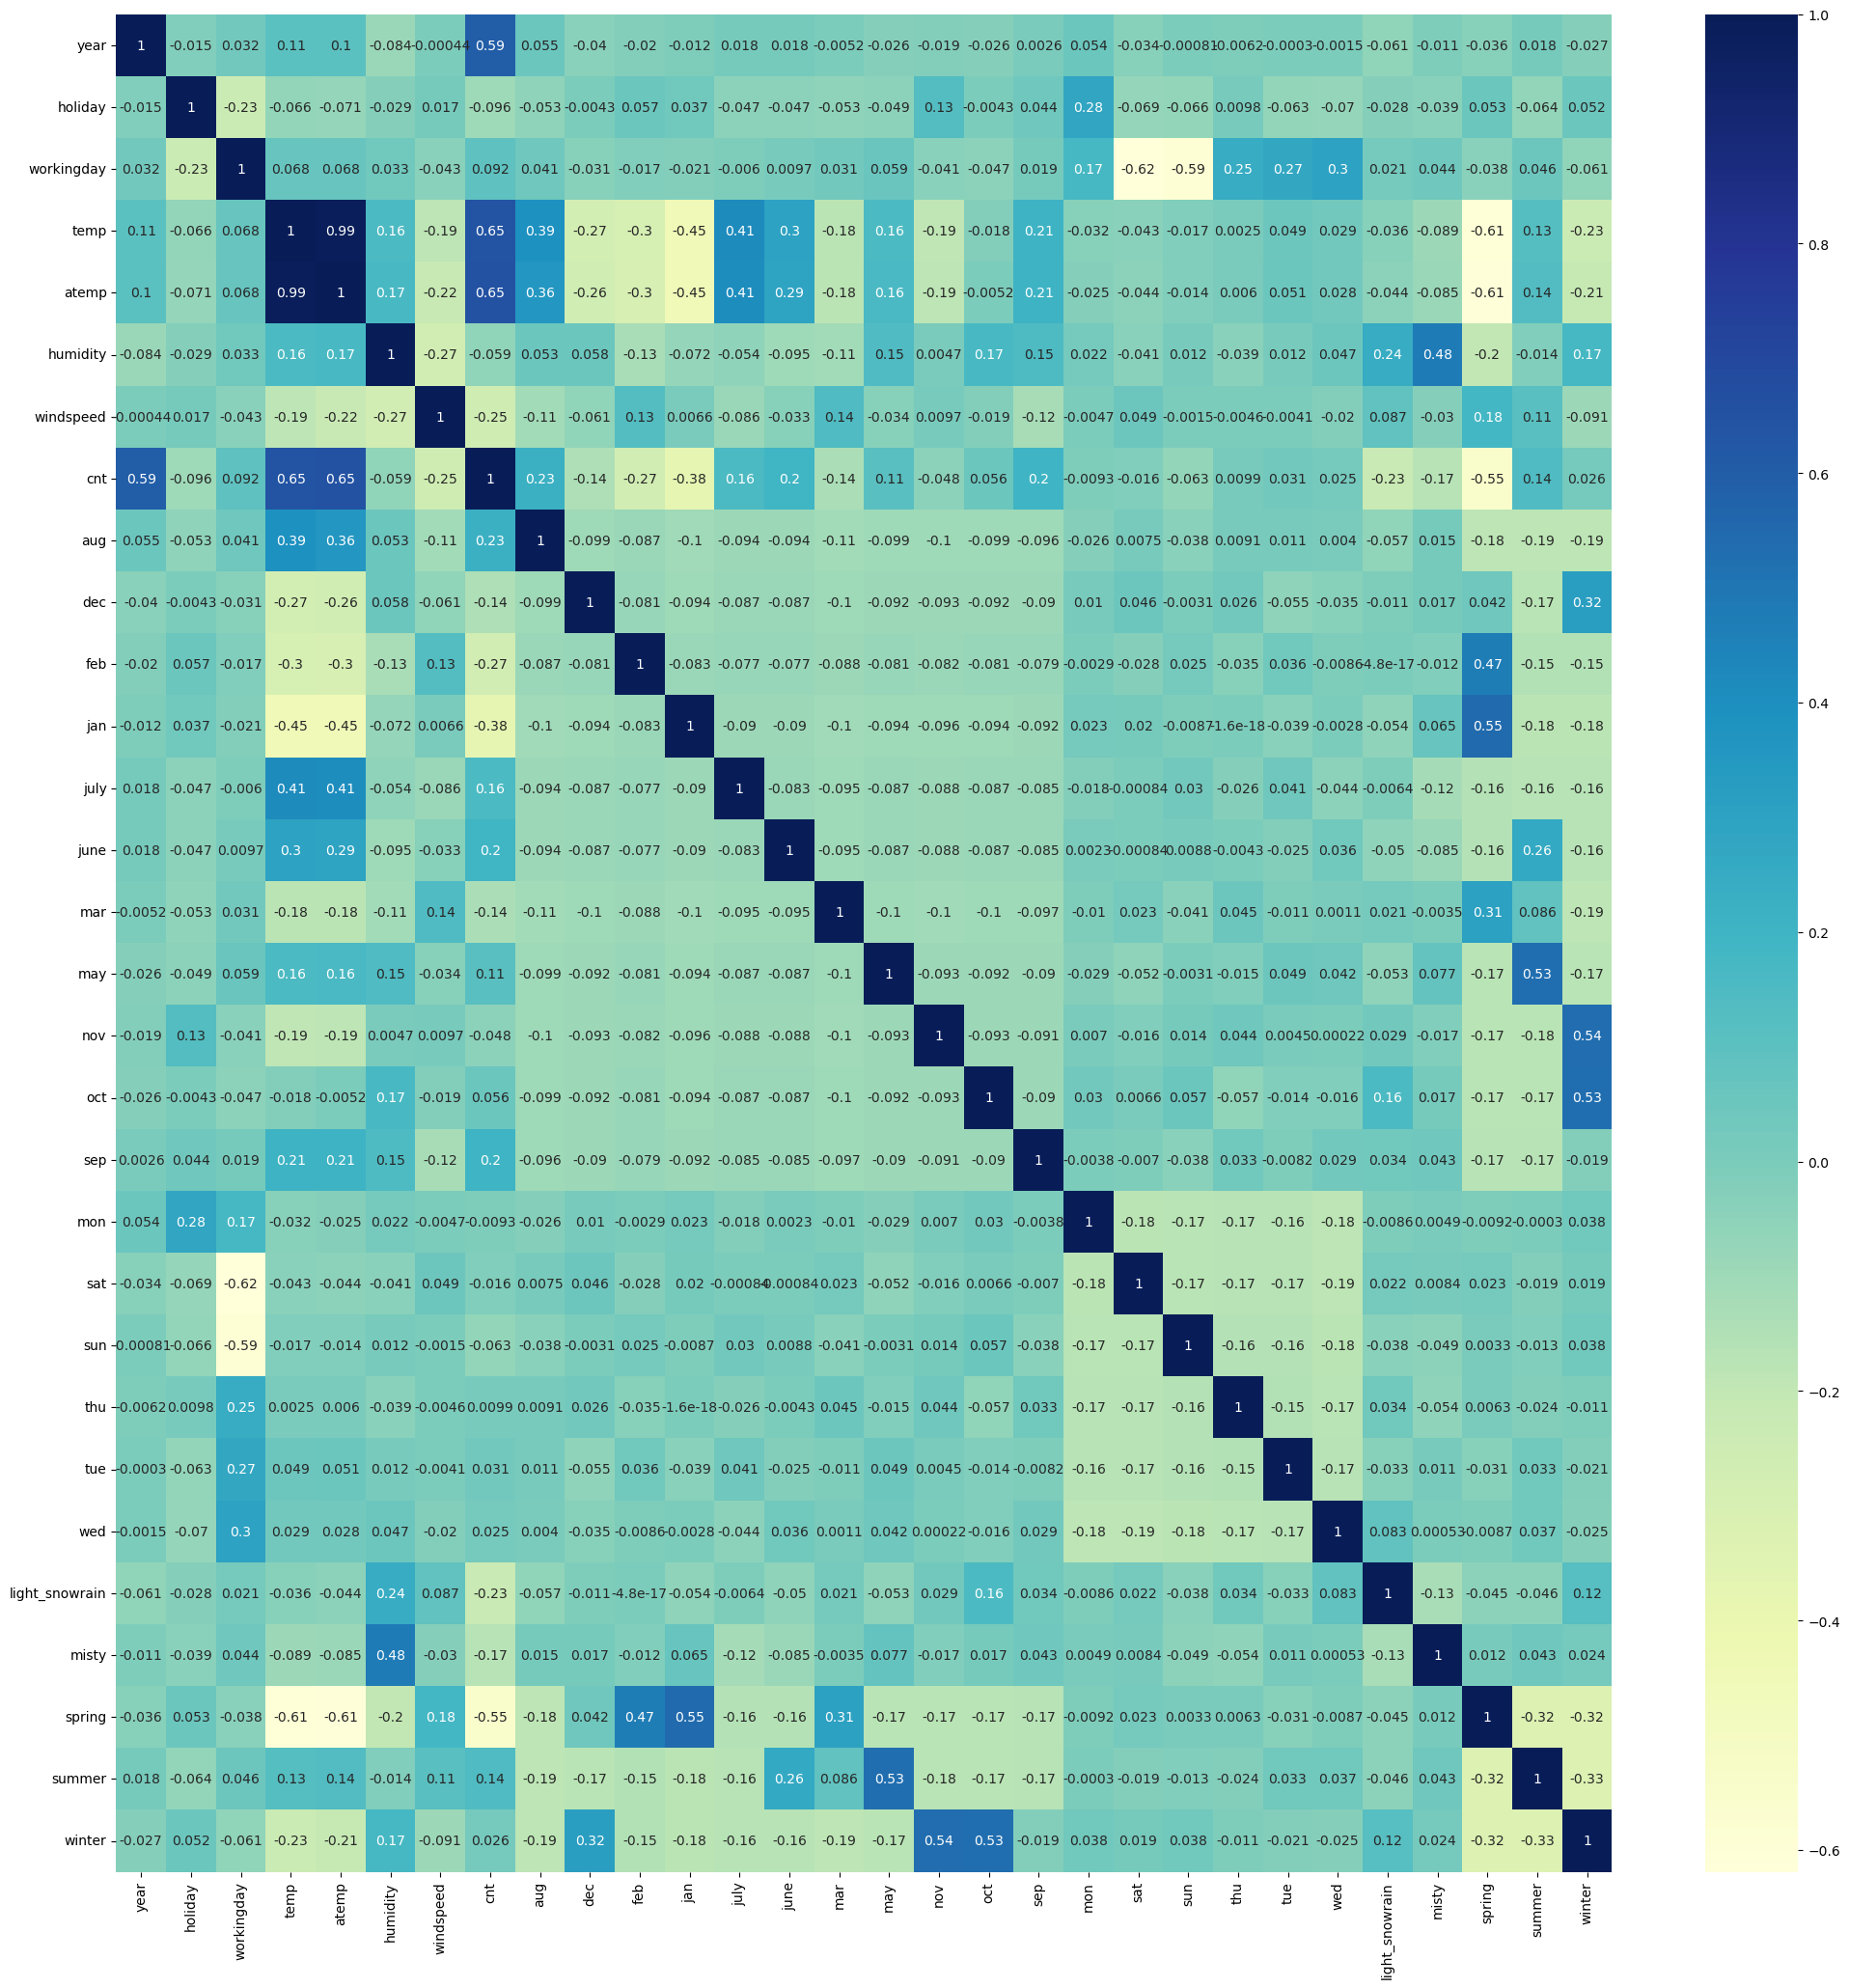

In [166]:
#checking which varibales are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [167]:
# Building the Linear Model

y_train = df_train.pop('cnt')
x_train = df_train

In [168]:
#generic function to calculate VIF
def vif(df):
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    print(vif)

In [169]:
#Model 1:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm)
lr_model_1 = lr.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.81e-180
Time:                        22:17:46   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2433      0.035      6.

In [170]:
vif(x_train)

          features    VIF
2       workingday  85.56
3             temp  66.90
4            atemp  56.03
19             sat  19.71
20             sun  18.34
26          spring  10.77
28          winter   9.46
27          summer   8.29
15             nov   6.79
7              aug   6.47
16             oct   6.47
10             jan   5.90
8              dec   5.68
11            july   5.64
17             sep   4.92
1          holiday   4.51
9              feb   4.39
13             mar   3.47
12            june   2.86
14             may   2.24
5         humidity   2.05
18             mon   1.98
23             wed   1.94
21             thu   1.83
22             tue   1.80
25           misty   1.60
24  light_snowrain   1.30
6        windspeed   1.30
0             year   1.06


#### Eliminating features using the following steps:
- here, we could have the following:
- high p, high VIF - remove these cases first
- high p, low VIF - remove these cases second
- low p, high VIF - remove these last
- low p, low VIF - keep it

In [171]:
#removing variables with high p-value and high VIF
x = x_train.drop(['mar'], axis = 1)

In [172]:
# Model 2:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_2 = lr.fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.75e-181
Time:                        22:17:46   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2441      0.033      7.

In [173]:
vif(x)

          features    VIF
2       workingday  74.90
3             temp  66.84
4            atemp  55.99
18             sat  17.21
19             sun  16.19
25          spring   9.66
27          winter   9.13
26          summer   7.99
7              aug   5.74
11            july   5.11
14             nov   4.86
15             oct   4.73
1          holiday   4.13
16             sep   4.05
8              dec   3.39
10             jan   2.62
12            june   2.56
5         humidity   2.04
9              feb   2.02
17             mon   1.98
13             may   1.96
22             wed   1.94
20             thu   1.83
21             tue   1.80
24           misty   1.60
23  light_snowrain   1.30
6        windspeed   1.30
0             year   1.06


In [174]:
#removing variables with high p-value and high VIF
x = x.drop(['june'], axis = 1)

In [175]:
#Model 3:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_3 = lr.fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.69e-182
Time:                        22:17:46   Log-Likelihood:                 527.09
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2447      0.033      7.

In [176]:
vif(x)

          features    VIF
2       workingday  74.40
3             temp  61.13
4            atemp  55.03
17             sat  17.04
18             sun  16.03
26          winter   8.85
24          spring   8.77
25          summer   7.54
13             nov   4.77
14             oct   4.45
1          holiday   4.13
7              aug   3.52
8              dec   3.38
11            july   3.06
15             sep   2.87
10             jan   2.55
5         humidity   2.02
9              feb   2.00
16             mon   1.98
21             wed   1.94
19             thu   1.83
20             tue   1.80
23           misty   1.60
12             may   1.52
22  light_snowrain   1.30
6        windspeed   1.28
0             year   1.05


In [177]:
#removing variables with high p-value and high VIF
x = x.drop(['oct'], axis = 1)

In [178]:
#Model 4:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_4 = lr.fit()
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.55e-183
Time:                        22:17:46   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2457      0.032      7.

In [179]:
vif(x)

          features    VIF
2       workingday  72.18
3             temp  60.92
4            atemp  54.96
16             sat  16.55
17             sun  15.54
23          spring   8.60
24          summer   6.66
25          winter   6.34
1          holiday   3.98
7              aug   3.19
11            july   2.81
10             jan   2.38
14             sep   2.23
5         humidity   1.99
15             mon   1.98
20             wed   1.94
9              feb   1.87
13             nov   1.85
18             thu   1.83
19             tue   1.80
8              dec   1.68
22           misty   1.59
12             may   1.52
21  light_snowrain   1.30
6        windspeed   1.27
0             year   1.05


In [180]:
#removing variables with high p-value and high VIF
x = x.drop(['wed'], axis = 1)

In [181]:
#Model 5:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_5 = lr.fit()
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.52e-184
Time:                        22:17:47   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

In [182]:
vif(x)

          features    VIF
2       workingday  70.22
3             temp  60.77
4            atemp  54.77
16             sat  16.52
17             sun  15.51
22          spring   8.60
23          summer   6.66
24          winter   6.34
1          holiday   3.92
7              aug   3.19
11            july   2.81
10             jan   2.38
14             sep   2.23
5         humidity   1.98
9              feb   1.87
13             nov   1.85
8              dec   1.68
21           misty   1.59
12             may   1.52
15             mon   1.41
20  light_snowrain   1.29
18             thu   1.29
19             tue   1.28
6        windspeed   1.27
0             year   1.05


In [183]:
#removing variables with high p-value and high VIF
x = x.drop(['atemp'], axis = 1)

In [184]:
#Model 6:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_6 = lr.fit()
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.42e-185
Time:                        22:17:47   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2447      0.032      7.

In [185]:
vif(x)

          features    VIF
2       workingday  70.18
15             sat  16.52
16             sun  15.51
21          spring   8.55
22          summer   6.60
23          winter   6.27
3             temp   4.92
1          holiday   3.91
6              aug   3.17
10            july   2.81
9              jan   2.38
13             sep   2.23
4         humidity   1.98
8              feb   1.87
12             nov   1.85
7              dec   1.68
20           misty   1.59
11             may   1.51
14             mon   1.40
17             thu   1.29
18             tue   1.28
19  light_snowrain   1.28
5        windspeed   1.22
0             year   1.05


In [186]:
#removing variables with high p-value and high VIF
x = x.drop(['holiday'], axis = 1)

In [187]:
#Model 7:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_7 = lr.fit()
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.42e-185
Time:                        22:17:47   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2539      0.048      5.

In [188]:
vif(x)

          features    VIF
3         humidity  36.38
2             temp  24.25
1       workingday  20.83
20          spring   8.39
21          summer   6.70
22          winter   6.69
14             sat   5.91
15             sun   5.58
4        windspeed   5.13
5              aug   3.26
9             july   2.89
8              jan   2.44
19           misty   2.37
12             sep   2.20
0             year   2.13
7              feb   1.94
11             nov   1.86
6              dec   1.72
10             may   1.61
13             mon   1.57
16             thu   1.47
17             tue   1.47
18  light_snowrain   1.31


In [189]:
#removing variables with high p-value and high VIF
x = x.drop(['thu'], axis = 1)

In [190]:
#Model 8:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_8 = lr.fit()
print(lr_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.36e-186
Time:                        22:17:47   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2512      0.048      5.

In [191]:
vif(x)

          features    VIF
3         humidity  36.34
2             temp  24.14
1       workingday  20.80
19          spring   8.36
21          winter   6.68
20          summer   6.68
14             sat   5.81
15             sun   5.49
4        windspeed   5.12
5              aug   3.26
9             july   2.89
8              jan   2.44
18           misty   2.36
12             sep   2.20
0             year   2.13
7              feb   1.94
11             nov   1.85
6              dec   1.71
10             may   1.61
13             mon   1.42
16             tue   1.33
17  light_snowrain   1.31


In [192]:
#removing variables with high p-value and high VIF
x = x.drop(['aug'], axis = 1)

In [193]:
#Model 9:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_9 = lr.fit()
print(lr_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.47e-187
Time:                        22:17:47   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2594      0.046      5.

In [194]:
vif(x)

          features    VIF
3         humidity  35.48
2             temp  22.61
1       workingday  19.86
18          spring   6.09
13             sat   5.52
14             sun   5.30
4        windspeed   5.09
20          winter   4.45
19          summer   3.76
7              jan   2.43
17           misty   2.36
0             year   2.12
6              feb   1.93
10             nov   1.85
5              dec   1.71
8             july   1.62
9              may   1.60
12             mon   1.41
11             sep   1.41
15             tue   1.33
16  light_snowrain   1.30


In [195]:
#removing variables with high p-value and high VIF
x = x.drop(['humidity'], axis = 1)

In [196]:
#Model 10:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_10 = lr.fit()
print(lr_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.21e-185
Time:                        22:17:47   Log-Likelihood:                 518.36
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     489   BIC:                            -905.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1898      0.043      4.

In [197]:
vif(x)

          features    VIF
1       workingday  18.02
2             temp  14.83
17          spring   5.53
12             sat   5.09
3        windspeed   4.95
13             sun   4.75
19          winter   3.85
18          summer   3.51
6              jan   2.33
0             year   2.10
5              feb   1.91
9              nov   1.81
4              dec   1.64
7             july   1.61
8              may   1.60
16           misty   1.60
11             mon   1.38
10             sep   1.36
14             tue   1.33
15  light_snowrain   1.10


In [198]:
#removing variables with high p-value and high VIF
x = x.drop(['may'], axis = 1)

In [199]:
#Model 11:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_11 = lr.fit()
print(lr_model_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     143.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.88e-186
Time:                        22:17:47   Log-Likelihood:                 518.03
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     490   BIC:                            -911.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1851      0.043      4.

In [200]:
vif(x)

          features    VIF
1       workingday  17.86
2             temp  14.42
16          spring   5.49
11             sat   5.03
3        windspeed   4.87
12             sun   4.71
18          winter   3.84
17          summer   2.83
6              jan   2.33
0             year   2.09
5              feb   1.91
8              nov   1.81
4              dec   1.63
7             july   1.61
15           misty   1.60
10             mon   1.38
9              sep   1.36
13             tue   1.33
14  light_snowrain   1.10


In [201]:
#removing variables with high p-value and high VIF
x = x.drop(['workingday'], axis = 1)

In [202]:
#Model 12:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_12 = lr.fit()
print(lr_model_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          8.28e-185
Time:                        22:17:47   Log-Likelihood:                 512.63
No. Observations:                 510   AIC:                            -987.3
Df Residuals:                     491   BIC:                            -906.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2754      0.033      8.

In [203]:
vif(x)

          features   VIF
1             temp  5.54
2        windspeed  4.71
15          spring  4.39
17          winter  3.11
16          summer  2.29
5              jan  2.22
0             year  2.08
4              feb  1.89
7              nov  1.80
6             july  1.61
14           misty  1.57
3              dec  1.56
10             sat  1.37
9              mon  1.36
8              sep  1.35
11             sun  1.35
12             tue  1.32
13  light_snowrain  1.09


In [204]:
#removing variables with high p-value and high VIF
x = x.drop(['sat'], axis = 1)

In [205]:
#Model 13
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_13 = lr.fit()
print(lr_model_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          7.44e-186
Time:                        22:17:47   Log-Likelihood:                 512.49
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     492   BIC:                            -912.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2773      0.033      8.

In [206]:
vif(x)

          features   VIF
1             temp  5.42
2        windspeed  4.68
14          spring  4.35
16          winter  3.07
15          summer  2.27
5              jan  2.21
0             year  2.08
4              feb  1.89
7              nov  1.80
6             july  1.60
13           misty  1.57
3              dec  1.56
8              sep  1.35
9              mon  1.27
10             sun  1.26
11             tue  1.24
12  light_snowrain  1.09


In [207]:
#removing variables with high p-value and high VIF
x = x.drop(['tue'], axis = 1)

In [208]:
# Model 14:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_14 = lr.fit()
print(lr_model_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     166.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.18e-186
Time:                        22:17:47   Log-Likelihood:                 511.73
No. Observations:                 510   AIC:                            -989.5
Df Residuals:                     493   BIC:                            -917.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2751      0.033      8.

In [209]:
#removing variables with high p-value and high VIF
x = x.drop(['feb'], axis = 1)

In [210]:
# Model 15:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_15 = lr.fit()
print(lr_model_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.97e-187
Time:                        22:17:47   Log-Likelihood:                 509.92
No. Observations:                 510   AIC:                            -987.8
Df Residuals:                     494   BIC:                            -920.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2608      0.032      8.

In [211]:
#removing variables with high p-value and high VIF
x = x.drop(['summer'], axis = 1)

# Model 16:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_16 = lr.fit()
print(lr_model_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.45e-187
Time:                        22:17:47   Log-Likelihood:                 507.30
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     495   BIC:                            -921.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3053      0.025     12.

In [212]:
vif(x)

          features   VIF
1             temp  4.79
2        windspeed  4.06
13          winter  2.59
12          spring  2.37
0             year  2.07
6              nov  1.79
4              jan  1.65
11           misty  1.53
3              dec  1.46
5             july  1.36
7              sep  1.21
8              mon  1.21
9              sun  1.20
10  light_snowrain  1.09


In [213]:
#removing variables with high p-value and high VIF
x = x.drop(['dec'], axis = 1)

# Model 17:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_17 = lr.fit()
print(lr_model_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.58e-186
Time:                        22:17:47   Log-Likelihood:                 502.39
No. Observations:                 510   AIC:                            -976.8
Df Residuals:                     496   BIC:                            -917.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2842      0.025     11.

In [214]:
#removing variables with high p-value and high VIF
x = x.drop(['nov'], axis = 1)

# Model 18:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_18 = lr.fit()
print(lr_model_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.06e-186
Time:                        22:17:47   Log-Likelihood:                 500.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2789      0.025     11.

In [215]:
#removing variables with high p-value and high VIF
x = x.drop(['mon'], axis = 1)

# Model 19:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_19 = lr.fit()
print(lr_model_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.99e-186
Time:                        22:17:47   Log-Likelihood:                 497.39
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2732      0.025     11.

In [216]:
#removing variables with high p-value and high VIF
x = x.drop(['jan'], axis = 1)

# Model 20:
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model_20 = lr.fit()
print(lr_model_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.75e-186
Time:                        22:17:48   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2586      0.024     10.

#### After 16 models, we observe that:
- the VIF for variables is less than 5 indicating low multicollinearity

#### After 20 models, we observe that:
- the p-value for remaining variables is 0 or close to 0 

#### the above two points indicate we do not need to drop varibales any further

#### the model explains ~83.2% variance in the data

In [217]:
x_train_sm = sm.add_constant(x)

In [218]:
#checking shape to prevent dimension mismatch while predicting the train set
print(y_train.shape)
print(x_train_sm.shape)
print(x.shape)

(510,)
(510, 11)
(510, 10)


In [219]:
#making predictions on the train set
y_train_pred = lr_model_20.predict(x_train_sm)

<Axes: ylabel='Density'>

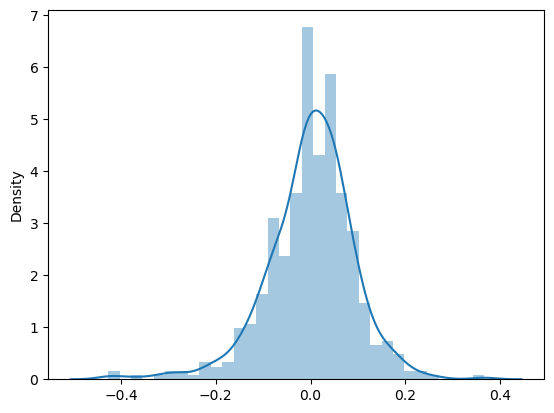

In [220]:
#compute residuals
res = y_train - y_train_pred

#distribution of error terms
sns.distplot(res)

#### We can observe the error values are normally distributed 

### Step5: Predictions & Evaluations on the test set

In [221]:
#scaling numerical variables on the test set similar to what was done for train set
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,0,...,0,0,1,0,0,0,0,0,1,0


In [222]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.530791,0.508362,0.418803,0.517923,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.248645,0.227648,0.200875,0.187683,0.239498,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [223]:
#creating x_test and y_test
y_test = df_test.pop('cnt')
x_test = df_test

In [224]:
#add a constant to test set
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
184,1.0,0,1,0,0.837241,0.778767,0.534223,0.149393,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1.0,1,0,1,0.911423,0.855132,0.470417,0.231142,0,0,...,0,0,0,0,1,0,0,0,1,0
299,1.0,0,0,1,0.496221,0.492359,0.777843,0.443398,0,0,...,0,0,1,0,0,0,1,0,0,1
221,1.0,0,0,1,0.890387,0.805661,0.236659,0.449707,1,0,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.821739,0.749249,0.070765,0.682387,0,0,...,0,0,1,0,0,0,0,0,1,0


In [225]:
#check shape to prevent dimension issues while predicting on the test set
print(y_test.shape)
print(x_test_sm.shape)

(220,)
(220, 30)


In [226]:
#dropping columns from the test set that we have dropped from the train set while building the model
x_test_sm.drop(['mar', 'june', 'oct', 'wed', 'atemp', 'holiday', 'thu', 'aug', 'humidity', 'may', 
               'workingday', 'sat', 'tue', 'feb', 'summer', 'jan', 'mon', 'nov', 'dec'], axis = 1, inplace = True)

In [227]:
#predicting on the test set
y_test_pred = lr_model_20.predict(x_test_sm)

In [238]:
# Evaluate the model
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.7968683846636846

- the r2 for test set is close to r2 gained on the train set which was ~0.83

Text(0, 0.5, 'y_pred')

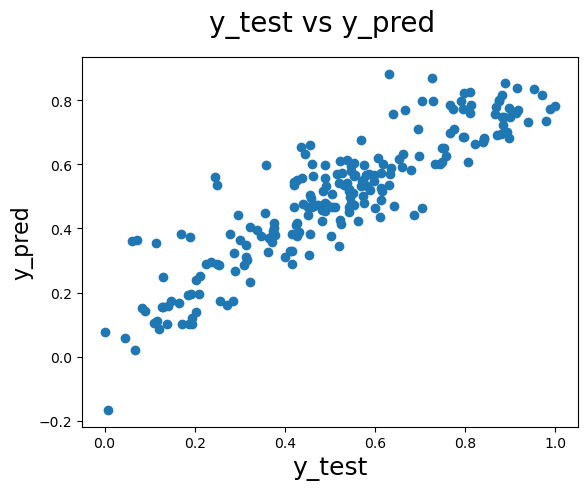

In [230]:
#plotting graph for actual vs. predicted values
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [232]:
round(lr_model_20.params,4)

const             0.2586
year              0.2346
temp              0.4493
windspeed        -0.1410
july             -0.0698
sep               0.0522
sun              -0.0443
light_snowrain   -0.2859
misty            -0.0797
spring           -0.1147
winter            0.0438
dtype: float64

- Therefore, the equation for the best fit line is:
    - cnt = 0.2586+ (0.2346)year + (0.4493)temp - (0.1410)windspeed - (0.0698)july - (0.0522)sep - (0.0443)sun - (0.2859)light_snowrain - (0.0797)misty - (0.1147)spring + (0.0438)winter

In [240]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.7659


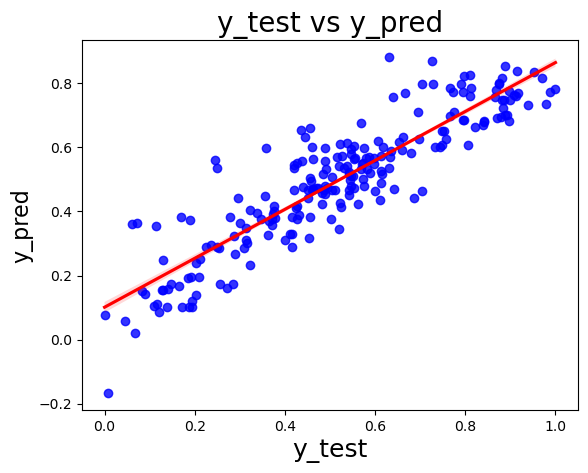

In [236]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Train vs Test Comparsion 
## R-Sqaured:
    - Train: 0.832
    - test: 0.829
## Adjusted R-Sqaured:
    - Train: 0.796
    - test: 0.7659

## Demand of bikes depend on year, temp, windspeed, july, sep, sun, light_snowrain, misty, spring, and winter.